<a href="https://colab.research.google.com/github/forexms78/AI-05-/blob/main/%ED%85%90%EC%84%9C_%EC%82%B4%ED%8E%B4%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 01. 텐서만들기


In [2]:
# 임포트할 때 파이토치가 아니라 그냥 토치라고 써야 합니다.
import torch

Python 리스트를 PyTorch 텐서로 변환하려면 torch.tensor() 함수를 사용합니다.

In [3]:
data_list = [1, 2]

tensor = torch.tensor(data_list)
tensor

tensor([1, 2])

In [4]:
type(tensor)

torch.Tensor

변환된 텐서는 리스트와 동일한 값을 가지며, tensor() 함수를 통해 PyTorch의 텐서 객체로 만들어집니다

생성한 텐서의 정보를 확인하려면 텐서 객체의 속성과 메서드를 사용할 수 있습니다.

In [5]:
print(f'data type: {tensor.dtype}') # 텐서의 데이터 타입
print(f'number of dimensions: {tensor.ndim}')
print(f'shape: {tensor.shape}') # 텐서의 차원
print(f'device: {tensor.device}') # 텐서가 할당된 장치(cpu/gpu)
print(f'requires_grad: {tensor.requires_grad}') # 자동 미분을 기록할 지 여부

data type: torch.int64
number of dimensions: 1
shape: torch.Size([2])
device: cpu
requires_grad: False


shape 속성 외에도 size() 메서드를 사용하여 텐서의 형태를 확인할 수 있습니다.

In [6]:
print(f'size: {tensor.size()}')

size: torch.Size([2])


numpy 배열에서 텐서를 생성하는 세 가지 방법이 있습니다.

In [7]:
import numpy as np

# 방법 1 : torch.tensor()

data_np = np.array(
    [
        [1, 2],
        [3, 4]
    ]
)

tensor_np = torch.tensor(data_np)
tensor_np

tensor([[1, 2],
        [3, 4]])

In [8]:
# 방법 2 : torch.from_numpy()

tensor_from_numpy = torch.from_numpy(data_np)
tensor_from_numpy

tensor([[1, 2],
        [3, 4]])

In [9]:
# 방법 3 : torch.as_tensor()

tensor_as_tensor = torch.as_tensor(data_np)
tensor_as_tensor

tensor([[1, 2],
        [3, 4]])

In [10]:
data_np[0, 0] = -1

print(f'torch.tensor() result\n{tensor_np}\n')
print(f'torch.from_numpy() result\n{tensor_from_numpy}')
print(f'torch.as_tensor() result\n{tensor_as_tensor}')

torch.tensor() result
tensor([[1, 2],
        [3, 4]])

torch.from_numpy() result
tensor([[-1,  2],
        [ 3,  4]])
torch.as_tensor() result
tensor([[-1,  2],
        [ 3,  4]])


- torch.tensor : 넘파이 배열의 데이터를 복사하여 텐서 생성 -> 메모리 공유 X
- torch.from_numpy : 넘파이 배열과 메모리 공유 -> 원본 배열 변경 되면 텐서도 변경됨, 넘파이 배열만 입력으로 허용됨
- torch.as_tensor : 메모리 공유 O, 다른 파이썬 객체에도 사용가능

In [11]:
torch_as_tensor2 = torch.from_numpy([[1, 2], [3, 4]])
torch_as_tensor2

# 파이썬 배열만으로 입력받아서 오류가 나타남 무조건 numpy배열로 받아야함

TypeError: expected np.ndarray (got list)

In [12]:
torch_as_tensor2 = torch.as_tensor([[1, 2], [3, 4]])
torch_as_tensor2

tensor([[1, 2],
        [3, 4]])

#### 데이터 타입 지정하기

PyTorch 텐서는 숫자로 구성된 다차원 배열이며, 텐서 내 모든 숫자는 동일한 데이터 타입을 가집니다. 기본 정수 타입은 torch.int64, 기본 실수 타입은 torch.float32입니다.

In [12]:
print(tensor.dtype)
print(tensor_np.dtype)

torch.int64
torch.int64


In [13]:
tensor = torch.tensor([1, 1.5])
tensor.dtype

torch.float32

dtype 매개변수를 사용하여 텐서의 데이터 타입을 명시적으로 설정할 수 있습니다.

In [14]:
tensor = torch.tensor([1, 2, 3], dtype=torch.float32)
tensor.dtype

torch.float32

#### 데이터 타입 변환하기

`.to()` 메서드 사용하기 : to() 메서드는 PyTorch에서 가장 일반적으로 사용되는 방식입니다. 장치(Device) 전환과 데이터 타입 변경 모두에 사용 가능합니다.


In [15]:
# Float 텐서를 정수형으로 변환
tensor = torch.tensor([1.2, 3.4, 5.6], dtype=torch.float32)
int_tensor = tensor.to(torch.int32)

print(int_tensor)  # tensor([1, 3, 5], dtype=torch.int32)


tensor([1, 3, 5], dtype=torch.int32)


In [16]:
int_tensor.device

device(type='cpu')

In [17]:
# 데이터 타입을 int로 변경하며 GPU로 이동
gpu_int_tensor = tensor.to(dtype=torch.int32, device="cuda")
print(gpu_int_tensor)  # Output: cuda:0


tensor([1, 3, 5], device='cuda:0', dtype=torch.int32)


 `.float()`, `.int()`, `.long()` 등 메서드 사용

PyTorch는 데이터 타입별로 빠르게 변환할 수 있는 메서드를 제공합니다.

In [18]:
# Float -> Int
int_tensor = tensor.int()

# Float -> Long(64bit 정수형 데이터 // 큰 정수를 다룰 때 사용 // 인덱싱, 범주형 데이터 처리, 라벨 등)
long_tensor = tensor.long()

# Float -> Double
double_tensor = tensor.double()

print(int_tensor)  # tensor([1, 3, 5], dtype=torch.int32)
print(long_tensor)  # tensor([1, 3, 5], dtype=torch.int64)
print(double_tensor)  # tensor([1.2000, 3.4000, 5.6000], dtype=torch.float64)


tensor([1, 3, 5], dtype=torch.int32)
tensor([1, 3, 5])
tensor([1.2000, 3.4000, 5.6000], dtype=torch.float64)


In [19]:
long_tensor[0]

tensor(1)

- **권장:** `.to(torch.<dtype>)` 방식.
- **빠르게 변환하려면:** `.float()`, `.int()`, `.long()` 등 사용.

데이터 타입을 변환할 때 `.to()` 메서드가 가장 유연하고 직관적입니다.

## 02. 특수한 텐서 생성 함수

PyTorch를 사용하다 보면 특수한 텐서를 만들어야 할 때가 생깁니다. 예를 들어 모든 값을 랜덤하게 초기화할 수도 있고요. 텐서의 모든 값을 0이나 1로 만들 때도 있죠. 이런 경우에 사용할 수 있는 함수를 몇 가지 살펴봅시다.

#### 랜덤한 값으로 만들기

랜덤한 값으로 텐서를 만드는 가장 대표적인 함수는 `rand()`입니다. 원하는 형태를 입력하면 0과 1 사이의 균등 분포를 바탕으로 난수 텐서가 만들어져요. 텐서 형태는 콤마로 숫자를 구분하여 입력해도 되고, 리스트나 튜플로 모아서 입력해도 됩니다.

In [20]:
# 난수 텐서

torch.rand(2, 3)
torch.rand([2, 3])
torch.rand((2, 3))


tensor([[0.7229, 0.7062, 0.3931],
        [0.2585, 0.4954, 0.3198]])

만약 min_val과 max_val 사이의 균등 분포에서 값을 추출하고 싶다면 이런 식으로 rand() 함수 결과를 변환해 주세요.



In [21]:
min_val, max_val = 0, 10
min_val + (max_val - min_val) * torch.rand(2, 3)


tensor([[4.1924, 0.6591, 8.5480],
        [5.5443, 1.9930, 1.1603]])

또 다른 함수로는 randn()이 있습니다. 원하는 형태를 입력하면 평균이 0, 표준편차가 1인 표준 정규 분포를 바탕으로 난수 텐서가 만들어져요.



In [22]:
torch.randn(2, 3)


tensor([[ 1.2105,  0.8074,  0.8401],
        [-0.6186,  1.4235,  0.6025]])

만약 평균 mu,  표준편차 sigma인 정규 분포를 활용하고 싶다면 이런 식으로 randn() 함수 결과를 변환해야 합니다.



In [23]:
mu, sigma = 1, 10
mu + sigma * torch.randn(2, 3)


tensor([[-6.1802, -5.7549,  1.8099],
        [10.1006, -7.1346,  0.0920]])

#### 특정한 값으로 만들기

zeros() 함수에 원하는 형태를 입력하면 값이 전부 0인 텐서를 만들 수 있습니다.



In [24]:
torch.zeros(2, 3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [25]:
#ones
torch.ones(2, 3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

그 외의 값을 원한다면 full() 함수에 원하는 형태를 리스트나 튜플로 입력하고, 이어서 어떤 값으로 텐서를 채울지도 입력하면 됩니다.

In [26]:
# full

torch.full((2, 3), 6)

tensor([[6, 6, 6],
        [6, 6, 6]])

### Quiz.
 파이썬 리스트 data_list와 NumPy array data_np가 주어져 있습니다. 이 두 데이터를 PyTorch 텐서로 만들어 주세요.

data_list에서 만든 텐서는 tensor_from_list 변수에 저장하고, data_np에서 만든 텐서는 tensor_from_np_array에 저장해야 합니다.

```
tensor([[ 1,  1],
        [-1, -1]])
tensor([[3, 4],
        [5, 6]])
```

In [28]:
import numpy as np
import torch

data_list = [
    [1, 1],
    [-1, -1],
]
data_np = np.array(
    [
        [3, 4],
        [5, 6]
    ]
)

# 여기에 코드를 작성하세요.
tensor_from_list = torch.tensor(data_list)
tensor_from_np_array = torch.from_numpy(data_np)
# tensor_from_np_array = torch.np_
# 테스트 코드
print(tensor_from_list)
print(tensor_from_np_array)

tensor([[ 1,  1],
        [-1, -1]])
tensor([[3, 4],
        [5, 6]])


## 03. 텐서의 변환과 연산

#### 텐서에서 NumPy 배열로 변환하기

PyTorch를 사용하다 보면 텐서를 NumPy 배열로 변환해야 할 때가 많습니다.

예를 들어, scikit-learn이나 pandas와 함께 사용하거나, matplotlib으로 시각화를 할 때 NumPy 배열이 유용하죠.

NumPy 배열은 디버깅할 때도 더 편리합니다.

텐서를 NumPy 배열로 변환하는 방법을 살펴보겠습니다.

In [29]:
import numpy as np
import torch

In [31]:
tensor = torch.ones(2, 2)
print(tensor)

tensor([[1., 1.],
        [1., 1.]])


numpy() 메서드를 사용하면 텐서를 NumPy 배열로 변환할 수 있습니다.

In [32]:
np_array = tensor.numpy()
np_array

array([[1., 1.],
       [1., 1.]], dtype=float32)

np.array() 함수에 텐서를 입력해도 동일한 결과를 얻을 수 있습니다.

In [33]:
np_array2 = np.array(tensor)
np_array2

array([[1., 1.],
       [1., 1.]], dtype=float32)


텐서를 NumPy 배열로 변환할 때 메모리 공유 여부는 방법에 따라 달라집니다.

아래 코드를 통해 차이를 확인할 수 있습니다.

In [34]:
tensor[0, 0] = -1

In [35]:
print(f'numpy() result\n{np_array}\n')
print(f'np.array() result\n{np_array2}')

numpy() result
[[-1.  1.]
 [ 1.  1.]]

np.array() result
[[1. 1.]
 [1. 1.]]


- `numpy()` 메서드: 텐서와 NumPy 배열이 메모리를 공유함.
- `np.array()`: 텐서의 데이터를 복사하여 새로운 NumPy 배열 생성.

#### Tensor의 연산

PyTorch에서는 텐서 간 다양한 연산을 지원합니다.

이 중 일부 대표적인 연산을 살펴보겠습니다.

In [36]:
a = torch.tensor([[1, 2],
                  [3, 4]])
b = torch.tensor([[1, 1],
                  [2, 2]])

같은 크기의 텐서 간 덧셈은 다음과 같이 수행합니다.

In [37]:
a + b

tensor([[2, 3],
        [5, 6]])

In [38]:
torch.add(a, b)

tensor([[2, 3],
        [5, 6]])

요소별 곱셈

In [39]:
a * b

tensor([[1, 2],
        [6, 8]])

In [40]:
torch.multiply(a, b)

tensor([[1, 2],
        [6, 8]])

행렬 곱셈은 `matmul()` 함수를 사용합니다.

곱셈하려는 두 텐서의 차원이 적합해야 합니다.

In [42]:
a = torch.tensor(
    [
        [1, 2],
        [3, 4],
        [5, 6],
        [7, 8],
    ]
)
b = torch.tensor(
    [
        [1, 0, 0],
        [0, 0, 1],
        [1, 1, 0],
    ]
)

print(f'a의 열 개수: {a.shape[1]}')
print(f'b의 행 개수: {b.shape[0]}')

a의 열 개수: 2
b의 행 개수: 3


In [43]:
torch.matmul(a, b)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (4x2 and 3x3)

In [44]:
a = torch.tensor(
    [
        [1, 2],
        [3, 4],
        [5, 6],
        [7, 8],
    ]
)
b = torch.tensor(
    [
        [1, 0, 0],
        [0, 0, 1],
    ]
)

print(f'a의 열 개수: {a.shape[1]}')
print(f'b의 행 개수: {b.shape[0]}')

a의 열 개수: 2
b의 행 개수: 2


In [45]:
torch.matmul(a, b)

tensor([[1, 0, 2],
        [3, 0, 4],
        [5, 0, 6],
        [7, 0, 8]])

In [46]:
a @ b

tensor([[1, 0, 2],
        [3, 0, 4],
        [5, 0, 6],
        [7, 0, 8]])

PyTorch는 두 텐서의 데이터 타입이 다르면 자동으로 데이터 타입을 일치시킵니다. 이 경우, 정수형 텐서가 실수형으로 변환되어 연산이 이루어집니다.


In [47]:
tensor_int = torch.tensor([1, 2], dtype=torch.int32)
tensor_float = torch.tensor([3, 4], dtype=torch.float32)

add_result = tensor_int + tensor_float
mul_result = tensor_int * tensor_float

print(add_result)
print(mul_result)

tensor([4., 6.])
tensor([3., 8.])


In [49]:
print(add_result.dtype)
print(mul_result.dtype)

torch.float32
torch.float32


torch.matmul은 행렬 곱셈을 수행하지만, 두 텐서의 데이터 타입이 다를 경우 에러가 발생합니다.
따라서 정수형 텐서를 실수형 텐서로 변환해야 합니다.


In [56]:
print(torch.__version__)

tensor_int = torch.tensor([1, 2], dtype=torch.int32)
tensor_float = torch.tensor(
    [
        [3, 1],
        [1, 4]
    ],
    dtype=torch.float32
)

result2 = tensor_int @ tensor_float
result = torch.matmul(tensor_int, tensor_float)
print(f"결과 텐서의 타입: {result.dtype}") # 결과 텐서의 타입: torch.float32


2.8.0+cu126


RuntimeError: expected m1 and m2 to have the same dtype, but got: int != float

In [57]:
tensor_cast = tensor_int.to(torch.float32)

torch.matmul(tensor_cast, tensor_float)

tensor([5., 9.])

#### 텐서 인덱싱


1차원 텐서의 인덱싱은 넘파이와 동일합니다.

In [58]:
tensor = torch.tensor([3, 5, 7, 9, 10])

In [59]:
tensor[0]

tensor(3)

In [60]:
tensor[2]

tensor(7)

In [61]:
tensor[-1]

tensor(10)

In [62]:
tensor[::2]

tensor([ 3,  7, 10])

 2차원 텐서 인덱싱 및 슬라이싱

In [64]:
tensor_2d = torch.tensor(
    [
        [1, 3, 5, 7, 9],
        [2, 4, 6, 8, 10],
    ]
)

In [ ]:
tensor_2d[0, :3]

tensor([1, 3, 5])

In [ ]:
tensor_2d[0, 3:]

tensor([7, 9])

In [66]:
tensor_2d[:, 1:4]

tensor([[3, 5, 7],
        [4, 6, 8]])

## 브로드캐스팅

PyTorch에서 텐서 연산을 수행할 때, 두 텐서의 **shape**가 반드시 같을 필요는 없습니다.

셰이프가 다른 텐서 간 연산을 자동으로 처리해 주는 기능이 바로 **브로드캐스팅**입니다.

a는 2x3 형태의 2차원 텐서, **b**는 크기가 3인 1차원 텐서입니다.

이 두 텐서를 더하면 어떻게 될까요?

In [67]:
a = torch.tensor(
    [
        [1, 2, 3],
        [4, 5, 6],
    ]
)
b = torch.tensor(
    [1, -1, 2],
)

print(f'a의 shape: {a.shape}')
print(f'b의 shape: {b.shape}')

a의 shape: torch.Size([2, 3])
b의 shape: torch.Size([3])


In [68]:
a + b

tensor([[2, 1, 5],
        [5, 4, 8]])

텐서 a의 각 행에 텐서 b가 자동으로 확장되어 덧셈 연산이 이루어졌습니다.

In [69]:
b_expanded = torch.tensor(
    [
        [1, -1, 2],
        [1, -1, 2],
    ]
)
a + b_expanded

tensor([[2, 1, 5],
        [5, 4, 8]])

#### 브로드캐스팅 동작원리

1. 크기가 1인 차원의 추가 : 차원 수가 적은 텐서는 차원 수가 많은 텐서와 맞추기 위해 **크기가 1인 차원**을 앞에 추가합니다.
2. 크기가 1인 차원의 확장 : 확장된 텐서에서 크기가 1인 차원은 상대 텐서에 맞춰 값이 복사됩니다.


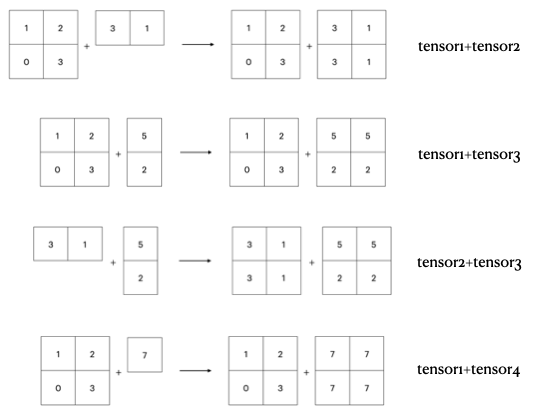

- 출처 : https://deeplearninguniversity.com/pytorch/pytorch-broadcasting/

In [70]:
a = torch.tensor(
    [
        [-1, 1],
        [1, 1],
    ]
)

In [71]:
a + 1

tensor([[0, 2],
        [2, 2]])

In [72]:
a * 2

tensor([[-2,  2],
        [ 2,  2]])

In [ ]:
a = torch.tensor(
    [
        [1, 2, 3],
        [4, 5, 6],
    ]
)
b = torch.tensor(
    [1, -1, 2],
)

print(f'a의 shape: {a.shape}')
print(f'b의 shape: {b.shape}')

a의 shape: torch.Size([2, 3])
b의 shape: torch.Size([3])


In [ ]:
b_expanded = torch.tensor(
    [
        [1, -1, 2],
        [1, -1, 2],
    ]
)
print(b_expanded.shape)

torch.Size([2, 3])


#### 브로드캐스팅이 불가능한 경우

브로드캐스팅은 모든 경우에 적용되는 것이 아닙니다.

셰이프가 서로 호환되지 않을 경우 연산이 불가능합니다.

In [73]:
a = torch.tensor(
    [
        [1, 2, 3],
        [4, 5, 6],
    ]
)
b = torch.tensor(
    [1, -1],
)

print(f'a의 shape: {a.shape}')
print(f'b의 shape: {b.shape}')

a의 shape: torch.Size([2, 3])
b의 shape: torch.Size([2])


In [74]:
a + b

RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 1

#### Quiz.

- 실습 설명   
세 개의 텐서 tensor0, tensor1, tensor2가 주어져 있습니다. 다음 단계를 따라 코드를 작성해 주세요.

1. tensor0과 tensor1을 더합니다.
2. 1번 결과와 tensor2를 행렬곱합니다.
3. 2번 결과에서 첫 번째 열에는 2를 더하고, 두 번째 열에서는 2를 뺍니다.
4. 3번 결과를 NumPy array로 변환합니다. 이때 변수 이름은 final_np_array로 설정합니다.

- 실습 결과   
코드 마지막 부분에서 print() 함수로 출력한 결과가 아래처럼 나와야 합니다.

```
[[ 6 -6]
 [ 0  0]]
```

In [79]:
import numpy as np
import torch

tensor0 = torch.tensor(
    [
        [1, 1],
        [-1, -1]
    ]
)
tensor1 = torch.tensor(
    [
        [1, 1],
        [0, 0]
    ]
)
tensor2 = torch.tensor(
    [
        [1, -1],
        [1, -1]
    ]
)

# 여기에 코드를 작성하세요.
result = tensor0 + tensor1
result = result @ tensor2
result = result + torch.tensor([
    [2,-2]
])
final_np_array = result.numpy()
# 테스트 코드
print(final_np_array)

[[ 6 -6]
 [ 0  0]]


## 텐서의 형태 바꾸기

PyTorch를 사용하다 보면 텐서의 값은 그대로 유지하면서 형태를 바꿔야 하는 경우가 생깁니다.

예를 들어, 다차원 텐서를 1차원으로 펼치거나, 차원을 추가하거나, 불필요한 차원을 제거해야 할 때가 있습니다.

이 섹션에서는 이러한 작업을 도와주는 메소드들을 살펴보겠습니다.

#### reshape 메소드

reshape() 메소드는 텐서의 값을 그대로 두면서 형태를 변경할 수 있습니다.

In [80]:
import torch

In [81]:
x = torch.randn(3, 4)
x

tensor([[ 0.4475, -0.6904,  0.7236, -0.3824],
        [ 0.0948, -0.0581, -0.6474, -0.1236],
        [-1.2840,  0.1232, -1.0788, -1.1017]])

In [89]:
res0 = x.reshape(2, 6)
res0

tensor([[ 0.4475, -0.6904,  0.7236, -0.3824,  0.0948, -0.0581],
        [-0.6474, -0.1236, -1.2840,  0.1232, -1.0788, -1.1017]])

원소 개수가 일치하지 않는 형태로 변환하려 하면 에러가 발생합니다.

In [90]:
x.reshape(2, 5)

RuntimeError: shape '[2, 5]' is invalid for input of size 12

In [91]:
res3=x.reshape(-1,2,2)
res3

tensor([[[ 0.4475, -0.6904],
         [ 0.7236, -0.3824]],

        [[ 0.0948, -0.0581],
         [-0.6474, -0.1236]],

        [[-1.2840,  0.1232],
         [-1.0788, -1.1017]]])

-1을 사용하면 나머지 차원의 크기를 PyTorch가 자동으로 계산합니다.

In [84]:
res1 = x.reshape(-1, 2, 3)
res1.size()

torch.Size([2, 2, 3])

In [85]:
x.reshape(-1) # 1차원으로 펼치기

tensor([ 0.4475, -0.6904,  0.7236, -0.3824,  0.0948, -0.0581, -0.6474, -0.1236,
        -1.2840,  0.1232, -1.0788, -1.1017])

#### `permute()`
permute() 메소드는 텐서의 형태를 자유롭게 바꾸는 것이 아니라 차원의 순서만 변경합니다.

In [92]:
x = torch.randn(2, 3, 4)
permuted = x.permute(2, 0, 1)  # index다

In [93]:
permuted.size()

torch.Size([4, 2, 3])

#### `t()` 메소드

In [95]:
#행과 열을 뒤바꾼다

x1 = torch.FloatTensor(2,3)
x2 = x1.t()
print(x1.size())
print(x2.size())

torch.Size([2, 3])
torch.Size([3, 2])


#### `squeeze()` 메소드

squeeze() 메소드는 크기가 1인 차원을 제거합니다.

In [96]:
x = torch.randn(1, 28, 1, 28)

In [97]:
result0 = x.squeeze()
result0.size()

torch.Size([28, 28])

특정 차원만 제거하려면 차원의 인덱스를 입력합니다.

In [99]:
result1 = x.squeeze(2)  # index로 제거
result1.size()

torch.Size([1, 28, 28])

#### `unsqueeze()` 메소드

unsqueeze() 메소드는 크기가 1인 차원을 추가합니다.

In [100]:
x = torch.randn(28, 28)

In [101]:
result0 = x.unsqueeze(0)
result0.size()

torch.Size([1, 28, 28])

In [102]:
result1 = x.unsqueeze(1) # 특정 위치에 차원을 추가할 수도 있습니다.
result1.size()

torch.Size([28, 1, 28])

## (심화) view() 메소드와 contiguous 개념

view() 메소드도 reshape() 메소드와 마찬가지로 전체 원소 개수를 유지하면서 텐서의 형태를 바꿀 때 사용합니다. 즉, 아래처럼 3x4 텐서가 있다고 하면, 원소 개수가 12개인 형태로 자유롭게 바꿀 수 있습니다.

In [ ]:
x = torch.randn(3, 4)
result = x.view(2, 6)  # 2 x 6 = 12

print(result.size())  # torch.Size([2, 6])

torch.Size([2, 6])


view() 메소드에서도 -1을 넣어 준 차원의 크기는 전체 원소 개수와 나머지 차원의 크기를 고려해 자동으로 지정됩니다.

In [ ]:
result = x.view(-1, 2, 3)  # (?) x 2 x 3 = 12

print(result.size())  # torch.Size([2, 2, 3])

torch.Size([2, 2, 3])


In [ ]:
result = x.view(-1)

print(result.size())  # torch.Size([12])

torch.Size([12])


view() 메소드로 나온 텐서는 원본 텐서와 메모리를 공유합니다. 아래 코드처럼 모든 값이 1인 텐서 x가 있고, view() 메소드로 형태를 바꾼 텐서 x_view가 있다고 해 볼게요.

In [ ]:
x = torch.ones(2, 3)
x_view = x.view(-1)

x[0, 0] = 0
print(x_view)  # tensor([0., 1., 1., 1., 1., 1.])

tensor([0., 1., 1., 1., 1., 1.])


두 텐서가 메모리를 공유하기 때문에, 원본 텐서인 x에서 값을 바꾸면 x_view 역시 영향을 받게 됩니다.

#### Contiguous란?

`view()` 메소드처럼 메모리를 공유하면서 텐서 형태를 바꾸려면, 텐서 값이 연속된 메모리 공간에 존재해야 합니다. PyTorch에서는 연속된 메모리를 갖는 텐서를 contiguous하다고 표현해요. 즉, contiguous한 텐서에서만 `view()` 메소드를 사용할 수 있는 겁니다.

어떤 텐서가 contiguous한지 알아보려면 `is_contiguous()` 메소드를 확인해 보면 됩니다. `True`면 contiguous한 텐서인 거고, `False`면 contiguous하지 않은 텐서인 거죠.

In [ ]:
x.is_contiguous()

True

실제로 PyTorch를 사용하다 보면 contiguous하지 않은 텐서가 만들어질 수 있습니다. 대표적으로 앞서 배운 permute() 메소드를 사용할 때가 있고요. 텐서를 슬라이싱하기만 해도 contiguous하지 않은 텐서가 나옵니다.

In [ ]:
x = torch.ones(3, 16, 28)
x_permuted = x.permute(2, 1, 0)
x_sliced = x[:, :, :10]

print(x_permuted.is_contiguous())  # False
print(x_sliced.is_contiguous())  # False

False
False


Contiguous하지 않은 텐서에서 view() 메소드를 사용하면 오류가 납니다. 그래서 아래처럼 contiguous() 메소드를 호출해서 먼저 contiguous한 텐서를 만들어 줘야 해요.

In [ ]:
# x가 contiguous하지 않을 때
x_cont = x.contiguous()
x_cont.view(-1)

tensor([1., 1., 1.,  ..., 1., 1., 1.])

한편 `reshape()` 메소드는 `view()` 메소드와 달리, 텐서가 contiguous하지 않아도 정상적으로 코드가 실행됩니다. 만약 contiguous한 텐서에서 `reshape()` 메소드를 사용하면 `view()` 메소드처럼 원본 텐서와 메모리를 공유하는 텐서가 나오고요. Contiguous하지 않은 텐서에서 사용하면, 원본 텐서에서 데이터만 복사되어 새로운 메모리를 갖는 텐서가 나옵니다.

앞서 배웠듯이 `view()` 메소드는 텐서가 contiguous하지 않으면 오류가 납니다. 텐서가 반드시 contiguous하다고 보장할 수 있다면 `view()` 메소드를 써도 좋지만, 안정적인 실행을 위해서는 되도록 `reshape()` 메소드를 쓰는 게 낫습니다. 하지만 `reshape()` 메소드를 쓸 때도 상황에 따라 원본 텐서와 reshape된 텐서가 메모리를 공유할 수도 있고 그러지 않을 수도 있어요. 이를 잘 고려하여 코드를 작성해야겠죠.

#### `transpose()` 메소드

torch.transpose()를 이용하여 특정 dimension을 변경할 수 있습니다.

In [ ]:
x1 = torch.FloatTensor(10,3,4,5)
print(x1.size())
print(torch.transpose(x1,1,2).size())
print(torch.transpose(x1,2,3).size())

## 여러 텐서 합치기

PyTorch를 사용하다 보면 여러 텐서를 하나로 합쳐야 하는 경우가 자주 있습니다.

이번 섹션에서는 이를 위한 두 가지 주요 함수, `cat()`과 `stack()`을 살펴보겠습니다.

#### `cat() 함수`

`cat()` 함수는 여러 텐서를 특정 차원에 따라 **이어 붙이는** 함수입니다.

이 과정을 **컨캐터네이트(concatenate)**라고도 부릅니다.

In [ ]:
import torch

In [ ]:
x = torch.zeros(2, 3)
y = torch.ones(2, 3)

In [ ]:
# concatenate
cat0 = torch.cat([x, y], dim=0)
cat1 = torch.cat([x, y], dim=1)

- **dim=0**: 텐서를 **행 방향**으로 붙입니다.
- **dim=1**: 텐서를 **열 방향**으로 붙입니다.

In [ ]:
print(cat0)
print(cat0.size())

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.]])
torch.Size([4, 3])


In [ ]:
print(cat1)
print(cat1.size())

tensor([[0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.]])
torch.Size([2, 6])


- 조건: 이어 붙일 텐서의 크기 제한

기준 차원을 제외한 나머지 차원의 크기가 같아야 합니다.

In [ ]:
x = torch.zeros(2, 3)
y = torch.ones(2, 4)

In [ ]:
cat1 = torch.cat((x, y), dim=1)

print(cat1)
print(cat1.size())

tensor([[0., 0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1., 1.]])
torch.Size([2, 7])


In [ ]:
cat0 = torch.cat((x, y), dim=0) # dim=0에서는 나머지 차원의 크기가 다르기 때문에 에러가 발생합니다.

RuntimeError: Sizes of tensors must match except in dimension 0. Expected size 3 but got size 4 for tensor number 1 in the list.

In [ ]:
x = torch.zeros(2, 3)
y = torch.ones(2, 3)

#### `stack()` 함수


`stack()` 함수는 여러 텐서를 특정 차원에 따라 **쌓는** 함수입니다.

`cat()` 함수와 달리, 결과 텐서에는 **새로운 차원**이 추가됩니다.

In [ ]:
stack_result = torch.stack([x, y], dim=0)
cat_result = torch.cat([x, y], dim=0)

RuntimeError: stack expects each tensor to be equal size, but got [2, 3] at entry 0 and [2, 4] at entry 1

In [ ]:
print(stack_result.size())
print(stack_result, '\n')

print(cat_result.size())
print(cat_result)

- dim=0: 새로운 0번 차원이 추가됩니다.

In [ ]:
stack_result_dim2 = torch.stack([x, y], dim=2) # dim=2: 새로운 2번 차원이 추가됩니다.

print(stack_result_dim2.size())
print(stack_result_dim2)

-  조건: 합칠 텐서의 크기 제한

`stack()` 함수로 합칠 텐서는 반드시 크기가 같아야 합니다.

**dim** 값에 관계없이 동일한 형태의 텐서만 사용할 수 있습니다.

In [ ]:
x = torch.zeros(2, 3)
y = torch.ones(2, 4)

torch.stack([x, y], dim=1)

#### `cat()` vs `stack()` 요약

| 함수 | 차원 추가 여부 | 제한 사항 |
| --- | --- | --- |
| `cat` | 없음 | 기준 차원을 제외한 크기가 같아야 함 |
| `stack` | 있음 | 모든 차원의 크기가 같아야 함 |

## 한 텐서를 여러 텐서로 나누기

#### split()

In [ ]:
import torch

x = torch.tensor(
    [
        [1, 2, 3, 4, 5],
        [6, 7, 8, 9, 10],
    ]
)

split() 메소드를 사용하면 텐서를 원하는 크기대로 나눌 수 있습니다. 메소드에 나누고 싶은 크기와 기준 차원을 입력해 주면 돼요. 나누어진 텐서들은 튜플로 묶여서 리턴됩니다. 아래 코드는 x를 0번 차원 기준으로 크기가 1이 되도록 나눕니다.

In [ ]:
x.split(1, dim=0)

(tensor([[1, 2, 3, 4, 5]]), tensor([[ 6,  7,  8,  9, 10]]))

1번 차원 기준으로 크기가 2인 텐서가 되도록 나누면 어떻게 될까요?      
- x가 2x5 텐서이기 때문에 1번 차원 기준으로 5가 2로 나누어 떨어지지 않습니다.
- 이럴 때는 일단 지정한 크기대로 최대한 텐서를 만들어 본 뒤 마지막 텐서는 더 작은 크기로 만들게 됩니다. 따라서 2x2 텐서 두 개가 나오고 나머지 크기만큼 2x1 텐서 하나가 나오죠.
- 즉, 상황에 따라서 마지막 텐서는 크기가 지정한 것보다 더 작을 수도 있어요.

In [ ]:
x.split(2, dim=1)

(tensor([[1, 2],
         [6, 7]]),
 tensor([[3, 4],
         [8, 9]]),
 tensor([[ 5],
         [10]]))

#### chunk() 메소드

`chunk()` 메소드로도 하나의 텐서를 여러 텐서로 나눌 수 있습니다. `split()`이 크기를 지정해서 텐서를 나눈다면, `chunk()`는 개수를 지정해서 텐서를 나누게 돼요. 메소드에 나누고 싶은 텐서의 개수와 기준 차원을 입력해 주면 됩니다. 나누어진 텐서들은 튜플로 묶여서 리턴됩니다.

위와 동일한 `x`가 있다고 했을 때, 아래 코드는 `x`를 0번 차원 기준으로 텐서 2개가 되도록 나눕니다. `x`가 2x5 텐서이기 때문에, 0번 차원으로는 텐서 두 개가 딱 떨어지게 나뉠 수 있어요.

In [ ]:
x

tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]])

In [ ]:
x.chunk(2, dim=0)

(tensor([[1, 2, 3, 4, 5]]), tensor([[ 6,  7,  8,  9, 10]]))

이번에는 1번 차원 기준으로 텐서를 셋으로 나눠 볼게요. x가 2x5 텐서니까 1번 차원 기준으로 텐서를 삼등분할 수는 없습니다. 이런 경우에는 일단 같은 크기로 텐서를 최대한 나누고, 마지막 텐서만 더 작은 크기를 갖게 됩니다. 결과를 보면 2x2 텐서 두 개에 2x1 텐서가 하나 나오죠.

In [ ]:
x.chunk(3, dim=1)

(tensor([[1, 2],
         [6, 7]]),
 tensor([[3, 4],
         [8, 9]]),
 tensor([[ 5],
         [10]]))

만약 1번 차원 기준으로 텐서를 넷으로 나누면 어떻게 될까요? x가 2x5 텐서인데 1번 차원 기준으로 크기가 2인 텐서를 세 개만 만들어도 6이 되니까 5를 넘어 버립니다. 결국 이 경우에는 2x2 텐서가 두 개까지밖에 나오지 못하며, 여기에 2x1 텐서 하나가 함께 나오게 돼요. 텐서를 넷으로 나누려고 했는데 세 개만 나온 거죠. 이처럼 상황에 따라 지정한 개수보다 더 적은 수로 텐서가 나뉠 수도 있습니다.

In [ ]:
x.chunk(4, dim=1)

(tensor([[1, 2],
         [6, 7]]),
 tensor([[3, 4],
         [8, 9]]),
 tensor([[ 5],
         [10]]))

In [ ]:
x.chunk(4, dim=1)

(tensor([[1, 2],
         [6, 7]]),
 tensor([[3, 4],
         [8, 9]]),
 tensor([[ 5],
         [10]]))

즉,
- 주어진 차원(`dim`)의 텐서 크기가 지정된 `chunks`로 나누어 떨어지는 경우, 반환된 모든 조각(chunk)은 동일한 크기를 가집니다.
- 그러나 주어진 차원의 텐서 크기가 `chunks`로 나누어 떨어지지 않는 경우, 반환된 조각들 중 마지막 조각만 다른 크기를 가질 수 있습니다.
- 이러한 분할이 불가능한 경우, 반환되는 조각의 수는 지정된 `chunks`보다 적을 수 있습니다.

## GPU

In [ ]:
import torch

딥 러닝 연산이라고 하면 굉장히 복잡할 것 같지만, 사실 앞서 살펴본 행렬 곱셈, 요소별 덧셈과 같은 행렬 연산이 대부분이에요. 딥 러닝 모델은 이런 기본적인 행렬 연산을 대규모로 여러 번 반복하여 복잡한 패턴을 학습하고 예측하게 됩니다.

GPU는 이런 대규모 행렬 연산을 빠르고 효율적으로 처리할 수 있는 장치예요. 그래서 딥 러닝의 발전을 이야기할 때면 GPU가 빠지지 않고 등장합니다.

PyTorch에서는 연산 장치를 명시적으로 설정하지 않으면 텐서를 기본적으로 CPU에 만들어요.

Colab에서 GPU 환경을 활성화한 상태로 텐서를 만든 뒤, 이 텐서가 어떤 장치에서 만들어졌는지 확인해 봅시다. 텐서 객체의 device 속성을 확인하면 돼요. GPU를 사용할 수 있는 환경임에도 텐서는 CPU에 만들어집니다.

In [ ]:
tensor = torch.tensor([1, 2])
print(tensor.device)  # cpu

cpu


GPU를 사용할 수 있는 환경이라면 CPU에 있는 텐서를 GPU로 옮길 수 있습니다. CPU에 있는 텐서를 GPU에 옮기기 전에, 우선 GPU를 사용할 수 있는 환경인지 먼저 체크해 주는 게 좋은데요.

아래처럼 코드를 작성하고 실행해 보세요. 결과가 True면 GPU를 사용할 수 있고, False면 GPU를 사용할 수 없습니다.

In [ ]:
torch.cuda.is_available()

True

CPU에 있는 텐서를 GPU로 옮길 때는 텐서의 `to()` 메소드를 이용하면 됩니다. 텐서의 데이터 타입을 바꿀 때 사용했던 메소드와 같은 메소드예요. `device` 속성을 확인했을 때 cuda라는 표시와 함께 숫자가 나오면 텐서가 GPU에 있다는 뜻입니다. 여기서 숫자 0은 GPU의 인덱스를 나타냅니다.

In [ ]:
if torch.cuda.is_available():
    tensor_gpu = tensor.to('cuda')

print(tensor_gpu.device)  # cuda:0

cuda:0


to() 메소드 대신 cuda() 메소드를 사용해도 됩니다. 다만 CPU에서 GPU로 텐서를 옮길 때에는 to() 메소드가 더 많이 사용되는 편입니다.

In [ ]:
if torch.cuda.is_available():
    tensor_gpu = tensor.cuda()

print(tensor_gpu.device)  # cuda:0

cuda:0


여러 대의 GPU를 사용할 수 있는 환경이라면 인덱스가 0, 1, 2, 3, … 이렇게 커지면서 서로 다른 GPU를 가리킬 수 있습니다. 예를 들어 GPU가 2대라면 아래처럼 0번 GPU와 1번 GPU에 각각 텐서를 옮길 수 있어요.

In [ ]:
tensor_gpu0 = tensor.to('cuda:0')
tensor_gpu1 = tensor.to('cuda:1')

RuntimeError: CUDA error: invalid device ordinal
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


만약 GPU를 사용할 수 없는 환경에서 텐서를 GPU로 옮기려고 하면 다음과 같은 오류가 발생합니다.

In [ ]:
# RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

#### GPU에 있는 텐서를 CPU로 옮기기

그런데 PyTorch를 사용하다 보면 GPU에 있는 텐서를 CPU로 옮겨야 할 때도 많습니다. 예를 들어 텐서를 NumPy array로 바꿔야 할 때, GPU 메모리를 효율적으로 관리해야 할 때 등이 그렇죠.

GPU에 있는 텐서를 CPU로 옮길 때도 `to()` 메소드를 사용하면 됩니다.

In [ ]:
tensor_cpu = tensor_gpu.to('cpu')
print(tensor_cpu.device)  # cpu

cpu


In [ ]:
# 또는 cpu() 메소드를 사용해도 같은 결과가 나옵니다. 참고로 GPU 텐서를 CPU로 옮길 때에는 to() 메소드보다 cpu() 메소드가 더 많이 쓰이는 편이에요.

In [ ]:
tensor_cpu = tensor_gpu.cpu()
print(tensor_cpu.device)  # cpu

cpu


#### `torch.device`로 장치 관리하기

PyTorch에서 제공하는 `device` 객체를 활용하면 장치를 보다 편하게 관리할 수 있습니다. 이런 식으로 `torch.device()`에 원하는 장치를 입력해 `device` 객체를 만들 수 있어요.

In [ ]:
device_cpu = torch.device('cpu')
device_gpu = torch.device('cuda')
device_gpu1 = torch.device('cuda:1')  # GPU가 2대 이상일 시

아래처럼 torch.cuda.is_available()에 따라 장치가 결정되도록 device 객체를 만드는 경우가 많습니다. 이 코드는 앞으로도 자주 나오니까 꼭 기억해 주세요.

In [ ]:
device_adaptive = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

한번 device 객체를 만들어 놓으면 이후에는 문자열이 아니라 객체를 사용해 텐서의 장치를 설정하면 됩니다. to() 메소드를 쓸 때에는 메소드 입력으로 device 객체를 넣어 주고, 텐서를 만들면서 device 파라미터를 쓸 때는 파라미터에 device 객체를 입력해 주세요.

In [ ]:
tensor = torch.tensor([1, 2, 3]).to(device_adaptive)
tensor = torch.tensor([1, 2, 3], device=device_adaptive)

#### 텐서 연산 시 주의할 점

텐서와 텐서가 어떤 연산을 할 때 두 텐서의 연산 장치는 동일해야 합니다. 그러니까 CPU에 있는 텐서끼리만 연산이 가능하고, 동일한 GPU에 있는 텐서끼리만 연산이 가능해요.

아래 코드는 CPU 텐서와 GPU 텐서를 더해 주는 코드입니다.

In [ ]:
tensor_cpu = torch.ones(1, 4)
tensor_gpu = torch.zeros(1, 4, device=torch.device('cuda'))

tensor_cpu + tensor_gpu

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

실행하면 아래와 같이 텐서의 연산 장치가 다르다는 오류가 발생합니다.